In [0]:
import torch.nn as nn
import torch
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [17]:
X_cpu, y_cpu = make_blobs(n_samples=40, centers=2, random_state=6)

# transformation des inputs numpy vers torch
X = torch.from_numpy(X_cpu).cuda().float()
y = torch.from_numpy(y_cpu).cuda().float()

# network dimensions
n_input_dim = X.shape[1]
n_output = 1  # Number of output nodes = 1 for binary classifier

# Build your network
net = nn.Linear(n_input_dim, 1)
net.cuda()

Linear(in_features=2, out_features=1, bias=True)

In [18]:

loss_func = nn.BCEWithLogitsLoss() #fonction de la loss
learning_rate = 0.001 #pas d'apprentissage
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate) # descente de gradient

num_iterations = 100
batch_size = 2
for i in range(num_iterations):
    rand = np.random.choice(X.shape[0], 2)
    input = X[rand]
    target = y[rand]

    # forward pass
    prob = net(input)

    #calcul de la loss
    loss = loss_func(prob, target.reshape(-1,1))

    #mis à jour du réseau
    loss.backward()
    optimizer.step()

    #print de la loss
    if i%10==0:
        print("Iter {} - loss: {:.2f}".format(i,loss.item()))


Iter 0 - loss: 2.36
Iter 10 - loss: 1.63
Iter 20 - loss: 1.23
Iter 30 - loss: 0.71
Iter 40 - loss: 0.26
Iter 50 - loss: 0.02
Iter 60 - loss: 0.00
Iter 70 - loss: 0.01
Iter 80 - loss: 0.00
Iter 90 - loss: 0.00


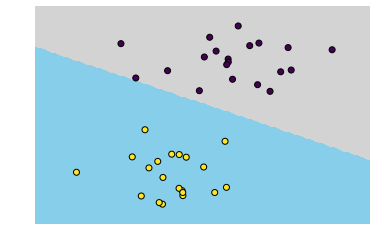

In [19]:
x_min, x_max = X_cpu[:, 0].min() - 1, X_cpu[:, 0].max() + 1
y_min, y_max = X_cpu[:, 1].min() - 1, X_cpu[:, 1].max() + 1

spacing = min(x_max - x_min, y_max - y_min) / 100


xx, yy = np.meshgrid(np.arange(x_min, x_max, spacing),
                     np.arange(y_min, y_max, spacing))

input = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).cuda().float()

Z = net(input)

Z = Z.detach().cpu().numpy()
# Put the result into a color plot
Z = Z.reshape(xx.shape)
Z = np.where(Z<0.5,0,1)

cmap = matplotlib.colors.ListedColormap(["lightgrey","skyblue"])
plt.contourf(xx, yy, Z, cmap=cmap)

plt.axis('off')

# Plot also the training points
plt.scatter(X_cpu[:, 0], X_cpu[:, 1], c=y_cpu, facecolors='none', edgecolors='k')
plt.show()
